In [58]:
import pandas as pd
import os
from os.path import join
import json
import seaborn as sns

In [59]:
overview_fields = ['module_id', 'title', 'summary', 'content', 'ilo', 'level', 'credits']

countries = []
institutions = []
years = []
overview_result = {}
for field in overview_fields:
    overview_result[field] = []
    
print(overview_result)

for root, dirs, files,  in os.walk("institutions"):
    for file in files:
        if file == "scrape_results.json":
            root_bits = root.split("/")
            country = root_bits[1]
            institution = root_bits[2]
            f = open(os.path.join(root,file))
            scrape_results = json.load(f)
            for year in scrape_results:
                for module in scrape_results[year]:
                    countries.append(country)
                    institutions.append(institution)
                    years.append(year)
                    module_details = scrape_results[year][module]
                    for field in overview_fields:
                        if field in module_details.keys():
                            overview_result[field].append(module_details[field])
                        else:
                            overview_result[field].append("")

overview_result['country'] = countries
overview_result['institution'] = institutions
overview_result['year'] = years
all_scrape_results = pd.DataFrame(overview_result)

all_scrape_results

                




{'module_id': [], 'title': [], 'summary': [], 'content': [], 'ilo': [], 'level': [], 'credits': []}


,module_id,title,summary,content,ilo,level,credits,country,institution,year
0,CM6333,Managing Change,<p>The module will introduce the fundamental p...,,<h3>On completion of the module a student shou...,CM6333,20 credits,Wales,Cardiff,2023
1,CS00710,<!--start_title-->License to Use Mathematics<!...,"<p><span class="""">\n \n This module reviews th...",1.\tSets: what are sets and how do we describe...,<h3>Learning Outcomes</h3>\n<p>\n \n On succes...,"This module is at <a href=""https://gov.wales/c...",,Wales,Aberystwyth,2023
2,CS02320,<!--start_title-->Foundation Programming<!--en...,The module will provide an introduction to pro...,Unit = approx. 2 weeks.<br>\n <br>\n Unit -1 I...,<h3>Learning Outcomes</h3>\n<p>\n \n On succes...,"This module is at <a href=""https://gov.wales/c...",,Wales,Aberystwyth,2023
3,CS21120,<!--start_title-->Algorithm Design and Data St...,"<p><span class="""">\n \n This module builds on ...",,<h3>Learning Outcomes</h3>\n<p>\n \n On succes...,"This module is at <a href=""https://gov.wales/c...",,Wales,Aberystwyth,2023
4,CS38220,<!--start_title-->Professional Issues in the C...,"<p><span class="""">\n \n This module addresses ...",Introduction to the course [1]\n<br>\n \n<br>\...,<h3>Learning Outcomes</h3>\n<p>\n \n On succes...,"This module is at <a href=""https://gov.wales/c...",,Wales,Aberystwyth,2023
...,...,...,...,...,...,...,...,...,...,...
814,Postgraduate Course: Probabilistic Modelling a...,Postgraduate Course: Probabilistic Modelling a...,This course follows the delivery and assessmen...,This course follows the delivery and assessmen...,"On completion of this course, the student will...",SCQF Level 11 (Year 4 Undergraduate),20,Scotland,Edinburgh,2023
815,Undergraduate Course: Informatics 2 - Software...,Undergraduate Course: Informatics 2 - Software...,Software Engineering and Professional Practice...,As students enter this course they team up in ...,Sommerville 'Software Engineering'<br>\nSommer...,SCQF Level 8 (Year 2 Undergraduate),20,Scotland,Edinburgh,2023
816,Undergraduate Course: Introduction to Mobile R...,Undergraduate Course: Introduction to Mobile R...,A mobile robot is a machine controlled by soft...,Delivery Method:<br>\n<br>\nThe course will be...,"On completion of this course, the student will...",SCQF Level 10 (Year 3 Undergraduate),10,Scotland,Edinburgh,2023
817,"Undergraduate Course: Logic, Computability and...","Undergraduate Course: Logic, Computability and...",This course examines some fundamental topics r...,This course will focus on key metatheoretical ...,"Upon successful completion of the course, stud...",SCQF Level 10 (Year 4 Undergraduate),20,Scotland,Edinburgh,2023


<Axes: xlabel='credits_int', ylabel='Count'>

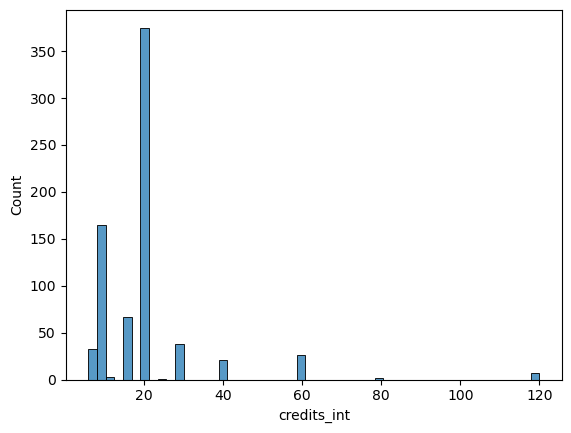

In [60]:
all_scrape_results['credits_int'] = all_scrape_results.credits.str.extract('([0-9]+)')

all_scrape_results['credits_int'] = pd.to_numeric(all_scrape_results.credits_int, errors='coerce')

all_scrape_results.sort_values('credits_int', inplace=True)
sns.histplot(data=all_scrape_results, x="credits_int")

<Axes: xlabel='country', ylabel='Count'>

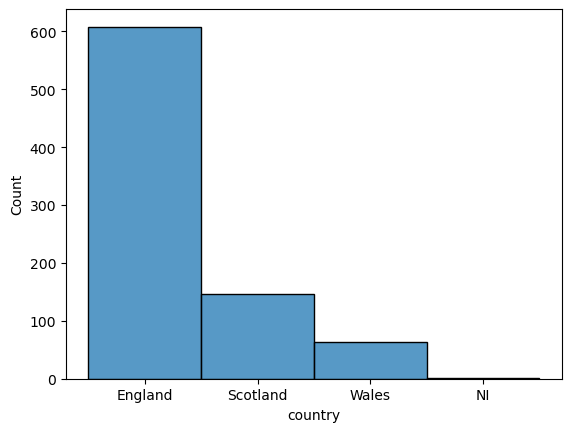

In [61]:
sns.histplot(data=all_scrape_results,x="country")

In [62]:
all_scrape_results.describe()

,credits_int
count,738.000000
mean,20.261518
std,14.539542
min,6.000000
25%,10.000000
50%,20.000000
75%,20.000000
max,120.000000


In [63]:
all_scrape_results.groupby('institution')['credits_int'].sum()

institution
Aberystwyth       0.0
Bath            348.0
Birmingham     2780.0
Cardiff          20.0
Chester         700.0
Dundee            0.0
Durham          870.0
Edinburgh      1030.0
Glasgow          20.0
London_Met      360.0
Newcastle       520.0
Northampton    2100.0
Nottingham     2580.0
QUB              20.0
Reading         630.0
Strathclyde    1495.0
Teesside        520.0
UCL             960.0
Name: credits_int, dtype: float64